# Sandy beaches - LTER data

These are data from MPA/REF site pairs that have been monitored by the Santa Barbara LTER since 2008. They measure kelp wrack cover, kelp abundance, and seabird abundance using the same methods that Jenny Dugan et al. used in the sandy beaches baseline surveys, and are using in the post-MPA surveys. Only one MPA/REF site pair overlaps with those for the MPA monitoring project: Isla Vista West Beach (MPA) and East UCSB Campus Beach (REF). We can use the data from this site pair to start including sandy beaches data into the MAP app.

Resources:
- [LTER catalogue](https://sbclter.msi.ucsb.edu/data/catalog/)
- [Kelp wrack data](https://sbclter.msi.ucsb.edu/data/catalog/package/?package=knb-lter-sbc.40)
- [Kelp and bird abundance](https://sbclter.msi.ucsb.edu/data/catalog/package/?package=knb-lter-sbc.51)

In [50]:
## Imports

import numpy as np
import pandas as pd
import matplotlib.pyplot as plt

In [5]:
## Load data

wrack = pd.read_csv('LTER_Wrack_Cover_All_Years_20201226.csv')
print(wrack.shape)

birds = pd.read_csv('LTER_Shorebird_count_20200310.csv')
print(birds.shape)

kelp = pd.read_csv('LTER_Shorebird_transect_environment_20200310.csv')
kelp.shape

(89072, 14)
(78315, 15)


(782, 16)

## Wrack

My guess is that the **IVWB** site code is the MPA site and the **EUCB** site is the reference site.

Kelp wrack measurements were taken in Sep, Nov, and Dec of 2008, and then monthly afterwards though the end of 2019. Kelp wrack is measured on 3 transects: A, B, and C.
```python
# Measurements were taken every month since Jan 2009
wrack.groupby('YEAR')['MONTH'].nunique()

# Measurements were taken in Sep, Nov, and Dec of 2008
wrack.loc[wrack['YEAR'] == 2008, 'MONTH'].unique()

# All transects (A, B, and C) are present for all surveys
any(wrack.groupby(['YEAR', 'MONTH', 'SITE'])['TRANSECT'].nunique() != 3)
```

In [22]:
## Filter data for relevant sites

wrack_site = wrack[wrack['SITE'].isin(['IVWB', 'EUCB'])].copy()
print(wrack_site.shape)
wrack_site.head()

(30476, 14)


,YEAR,MONTH,SITE,TRANSECT,HTS,WTO,TYPE,COVER,WRACK_VOL,BIOMASS,TAXON_GENUS,TAXON_SPECIES,DESCRIPTION,TAXON_GROUP
342,2008,11,EUCB,A,18.6,48.0,A,0.13,0.00975,0.0,-99999,-99999,Animal,ANIMAL
343,2008,11,EUCB,A,18.6,48.0,ABRO,0.00,0.00000,0.0,Abronia,spp,red or pink sand verbena,PLANT
344,2008,11,EUCB,A,18.6,48.0,AMBR,0.00,0.00000,0.0,Ambrosia,chamissonis,Beach burr,PLANT
345,2008,11,EUCB,A,18.6,48.0,ATRI,0.00,0.00000,0.0,Atriplex,leucophylla,Salt bush,PLANT
346,2008,11,EUCB,A,18.6,48.0,B,0.16,0.00100,0.0,-99999,-99999,Other brown algae,ALGAE


In [23]:
## Add scientific name column

wrack_site['SCIENTIFIC_NAME'] = wrack_site['TAXON_GENUS'] + ' ' + wrack_site['TAXON_SPECIES']
wrack_site.head()

,YEAR,MONTH,SITE,TRANSECT,HTS,WTO,TYPE,COVER,WRACK_VOL,BIOMASS,TAXON_GENUS,TAXON_SPECIES,DESCRIPTION,TAXON_GROUP,SCIENTIFIC_NAME
342,2008,11,EUCB,A,18.6,48.0,A,0.13,0.00975,0.0,-99999,-99999,Animal,ANIMAL,-99999 -99999
343,2008,11,EUCB,A,18.6,48.0,ABRO,0.00,0.00000,0.0,Abronia,spp,red or pink sand verbena,PLANT,Abronia spp
344,2008,11,EUCB,A,18.6,48.0,AMBR,0.00,0.00000,0.0,Ambrosia,chamissonis,Beach burr,PLANT,Ambrosia chamissonis
345,2008,11,EUCB,A,18.6,48.0,ATRI,0.00,0.00000,0.0,Atriplex,leucophylla,Salt bush,PLANT,Atriplex leucophylla
346,2008,11,EUCB,A,18.6,48.0,B,0.16,0.00100,0.0,-99999,-99999,Other brown algae,ALGAE,-99999 -99999


**Columns:**
- HTS: Distance to the 24 hour high tide strand line in meters
- WTO: Distance to the water table outcrop in meters
- TYPE: Type of cover observed

```python
# See TYPE values and definitions:
dict(zip(wrack_site['TYPE'], wrack_site['DESCRIPTION']))
```

- COVER: Total length of wrack type along a transect in meters
- WRACK_VOL: Total volume of wrack type along a transect in meters; calculated from measured length and depth and assumed width of 1 meter
- BIOMASS: Total biomass of wrack type in kilograms
- TAXON_GENUS: Genus of organism observed, if TYPE is an organism
- TAXON_SPECIES: Species of organism observed, if TYPE is an organism
- DESCRIPTION: Description of TYPE codes
- TAXON_GROUP: Whether the TYPE is 'ANIMAL', 'PLANT', 'ALGAE', 'OTHER', or 'SUBSTRATE'

**NOTE** that the missing data value for this data set is -99999

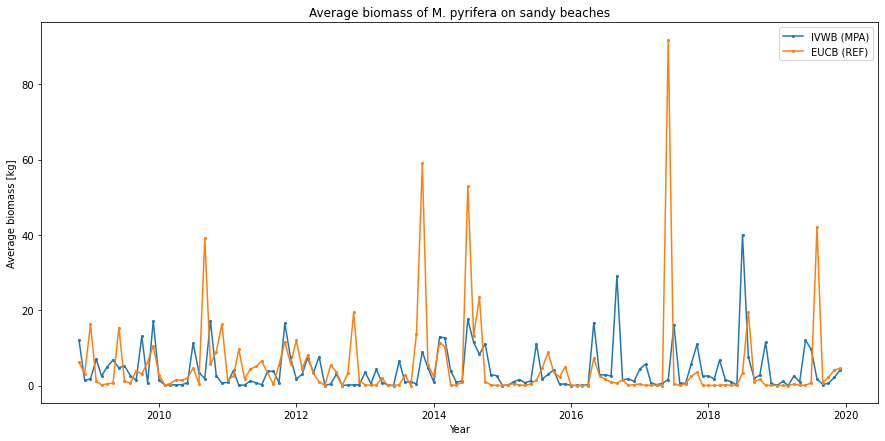

In [68]:
## Obtain and plot (for example) average biomass of M. pyrifera through time

# Get data
kelp_wrack_biomass = pd.DataFrame({
    'date':wrack_site['YEAR'].astype(str) + '-' + wrack_site['MONTH'].astype(str),
    'site':wrack_site['SITE'],
    'transect':wrack_site['TRANSECT'],
    'species':wrack_site['SCIENTIFIC_NAME'],
    'biomass':wrack_site['BIOMASS']
})
kelp_wrack_biomass['datetime'] = pd.to_datetime(kelp_wrack_biomass['date'], format='%Y-%m')
kelp_wrack_biomass = kelp_wrack_biomass[kelp_wrack_biomass['species'] == 'Macrocystis pyrifera']
total_kelp = kelp_wrack_biomass.groupby(['datetime', 'site', 'transect'], as_index=False)['biomass'].sum()
avg_total_kelp = total_kelp.groupby(['datetime', 'site'], as_index=False)['biomass'].mean()

# Plot
plt.figure(figsize=(15, 7))

plt.plot(
    'datetime',
    'biomass',
    data = avg_total_kelp[avg_total_kelp['site'] == 'IVWB'],
    marker = 'o',
    markersize = 2
)

plt.plot(
    'datetime',
    'biomass',
    data = avg_total_kelp[avg_total_kelp['site'] == 'EUCB'],
    marker = 'o',
    markersize = 2
)

plt.xlabel('Year')
plt.ylabel('Average biomass [kg]')
plt.title('Average biomass of M. pyrifera on sandy beaches')
plt.legend(labels=['IVWB (MPA)', 'EUCB (REF)'])

plt.show()

## Birds

This one seems pretty self-explanatory. These observations are taken in concert with the kelp data.

Surveys seem to mostly have been done monthly between 2008 and 2019, with 1-2 dates surveyed per month. Surveys involve walking a 1 km permanent transect at each site and recording all birds observed. Data includes the bird species and the number of individuals observed.

```python
birds_site = birds[birds['SITE'].isin(['IVWB', 'EUCB'])]
birds_site.groupby(['YEAR', 'MONTH'])['DATE'].nunique()
```

In [74]:
## Look at data

birds_site = birds[birds['SITE'].isin(['IVWB', 'EUCB'])]
birds_site.head()

,YEAR,MONTH,DATE,SITE,COMMON_NAME,TOTAL,TAXON_GENUS,TAXON_SPECIES,TAXON_GROUP,SURVEY,TAXON_KINGDOM,TAXON_PHYLUM,TAXON_CLASS,TAXON_ORDER,TAXON_FAMILY
115,2008,11,10/30/08,IVWB,AMERICAN AVOCET,0,Recurvirostra,americana,shorebird,Shorebirds,Animalia,Chordata,Aves,Charadriiformes,Recurvirostridae
116,2008,11,10/30/08,IVWB,AMERICAN COOT,0,Fulica,americana,coot,Shorebirds,Animalia,Chordata,Aves,Gruiformes,Rallidae
117,2008,11,10/30/08,IVWB,AMERICAN CROW,5,Corvus,brachyrhynchos,crow,Shorebirds,Animalia,Chordata,Aves,Passeriformes,Corvidae
118,2008,11,10/30/08,IVWB,AMERICAN GOLDFINCH,0,Spinus,tristis,finch,Shorebirds,Animalia,Chordata,Aves,Passeriformes,Fringillidae
119,2008,11,10/30/08,IVWB,AMERICAN PIPIT,0,Anthus,rubescens,other,Shorebirds,Animalia,Chordata,Aves,Passeriformes,Motacillidae


## Kelp

This includes the kelp plants and holdfasts observed when walking a permanent, 1 km transect at each site. These data are taken in concert with the bird data. I **think** "kelp" here refers to M. pyrifera only.

Surveys seem to mostly have been done monthly between 2008 and 2019, with 1-2 dates surveyed per month.

```python
kelp_site = kelp[kelp['SITE'].isin(['IVWB', 'EUCB'])]
kelp_site.groupby('YEAR')['MONTH'].nunique()
kelp_site.groupby(['YEAR', 'MONTH'])['DATE'].nunique()
```

In [78]:
## View data

kelp_site = kelp[kelp['SITE'].isin(['IVWB', 'EUCB'])]
kelp_site.head()

,YEAR,MONTH,DATE,SITE,START,FINISH,AVG_WIND,MAX_WIND,DIRECTION,AIR_TEMP,WIND.CHILL,FOOTPRINTS,DOG_TRACKS,KELP_PLANTS,HOLDFASTS,INVESTIGATOR
2,2015,9,9/25/15,IVWB,2:40,3:15,3.1,4.2,SW,24.0,23.4,>10,>10,5,1,Hubbard
4,2015,9,9/25/15,EUCB,1:45,2:30,2.2,5.4,WNW,25.4,22.3,>1,>1,27,14,Dugan
5,2017,1,1/24/17,EUCB,2:40 PM,3:15 PM,1.4,1.8,WNW,12.7,12.4,>1,>1,49,0,Dugan
6,2017,1,1/24/17,IVWB,3:30 PM,3:50 PM,0.2,0.7,SW,12.1,12.1,>10,>1,377,0,Hubbard
16,2017,2,2/24/17,EUCB,2:50 PM,3:20 PM,1.3,1.7,WNW,16.1,15.4,>1,-99999,706,0,Dugan
